<a href="https://colab.research.google.com/github/hellosanjeev/tweet_anaylsis/blob/main/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nlpaug

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#from textagumentation import  Wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,SimpleRNN, LSTM, GRU,Bidirectional,Dropout

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer

# Training   dataset 

In [ ]:
df_train=pd.read_csv("train.csv")
df_train.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df_train.drop(labels='id',axis=1,inplace=True)

In [ ]:
df_train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
df_train.isna().sum()

label    0
tweet    0
dtype: int64

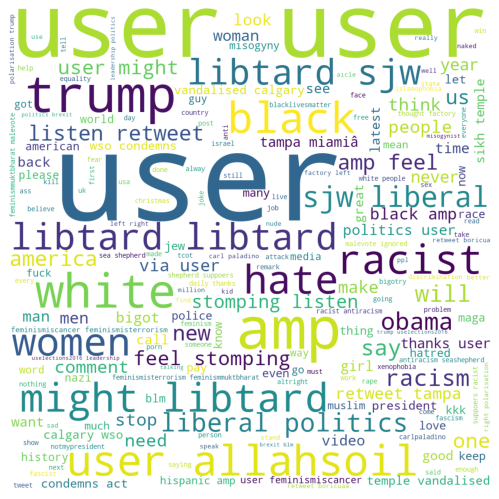

In [ ]:
wc = WordCloud(width = 1000, 
               height = 1000, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df_train[df_train["label"]==1]["tweet"]))

plt.figure(figsize = (8,8),dpi=80) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

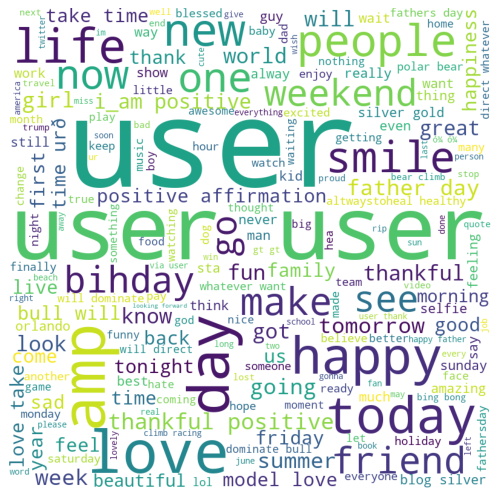

In [ ]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df_train[df_train["label"]==0]["tweet"]))

plt.figure(figsize = (8,8),dpi=80) 

plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [ ]:
df_train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

x:1 29720
y:0 2242


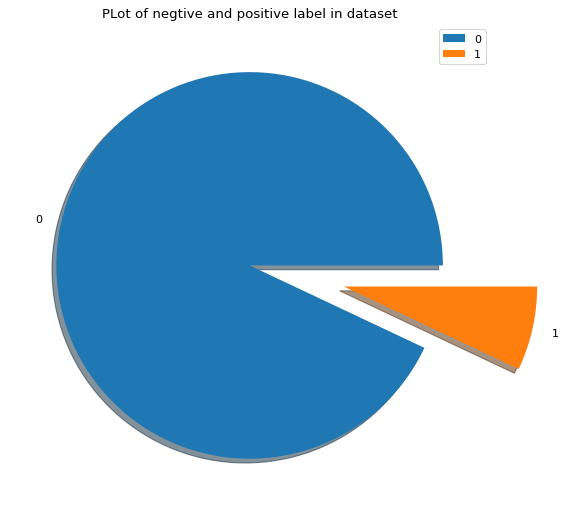

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8,8), dpi=80)
x,y=df_train.label.value_counts()
print("x:1",x)
print("y:0",y)
a=[x,y]
myexplode=[0,0.5]
plt.pie(a,labels=[0,1],explode=myexplode,shadow=True)
plt.title("PLot of negtive and positive label in dataset")
plt.legend()

# Data Cleanning

In [ ]:
# data cleaning
def clean_text(text):
    stop = stopwords.words('english') #stopwords list
    punc = list(punctuation) #punctuation list
    bad_tokens = stop + punc
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text) # tokenization
    word_tokens = [t for t in tokens if t.isalpha()] # removing numbers 
    # lemmatization,  stopwords & punctuation removal, to lower case
    clean_token = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return " ".join(clean_token)

In [ ]:
df_train["tweet"] =df_train["tweet"].apply(clean_text)

In [ ]:
df_train["tweet"].head()

0    user father dysfunctional selfish drag kid dys...
1    user user thanks lyft credit ca use cause offe...
2                                       bihday majesty
3                             model love u take u time
4                        factsguide society motivation
Name: tweet, dtype: object

In [ ]:
df_train["tweet"].head(5)

0    user father dysfunctional selfish drag kid dys...
1    user user thanks lyft credit ca use cause offe...
2                                       bihday majesty
3                             model love u take u time
4                        factsguide society motivation
Name: tweet, dtype: object

In [ ]:
#convert into matrix
x = df_train["tweet"].values
y = df_train["label"].values

In [ ]:
print("\'X\' length of data ",len(x))

'X' length of data  31962


convert to list before performing augmentation

In [ ]:
#convert dataframe to list
text_tweet=df_train["tweet"].tolist()
text_label=df_train["label"].tolist()

In [ ]:
print("Before augmention",len(text_tweet))

Before augmention 31962


In [ ]:
#text="hello nice to meet you"
import nlpaug.augmenter.word as naw
aug = naw.AntonymAug()
augmented_data = aug.augment(text_tweet)
print(augmented_data)
tweet=list(augmented_data)

['user father dysfunctional unselfish drag kid dysfunction idle', 'user user thanks lyft credit ca use cause offer wheelchair van pdx disapointed getthanked', 'bihday majesty', 'model love u obviate u time', 'factsguide society motivation', 'huge fan fare little keep quiet leave chaos pay dispute take away allshowandnogo', 'user camping tomorrow user user user user user user user', 'next school year year ca forget school exam hate imagine actorslife revolutionschool girl', 'love land allin cavs champion cleveland clevelandcavaliers', 'user user welcome', 'ireland consumer price index mom wane previous may blog silver gold forex', 'unselfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems unselfish heabreaking value love', 'leave see daddy today gettingfed', 'user cnn call michigan late school wall chant tcot', 'comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins', 'ouch senior junior yugyoem omg', 'thankful paner ungrateful positiv

In [ ]:
print("After Augumentation",len(tweet))

After Augumentation 31962


In [ ]:
#convert one to 0
def covertor(list1):
  newList_label=[]
  for i in list1:
    if i==0:
      newList_label.append('0')
    else:
      newList_label.append('1')
  return newList_label
    
label=covertor(text_label)
len(label)

31962

In [ ]:
aug_data = {
  "tweet":tweet,
  "label":label
}

In [ ]:
df_new=pd.DataFrame(aug_data)
df_new

,tweet,label
0,user father dysfunctional unselfish drag kid d...,0
1,user user thanks lyft credit ca use cause offe...,0
2,bihday majesty,0
3,model love u obviate u time,0
4,factsguide society motivation,0
...,...,...
31957,ate user isz youuu,0
31958,see nina turner airwave trying wrap mantle cou...,0
31959,listening sad song monday morning otw work sad,0
31960,user sikh temple vandalised calgary wso condem...,1


In [ ]:
df_new.isna().sum()

tweet    0
label    0
dtype: int64

In [ ]:
def change():
  return df_new.append(df_train)


In [ ]:
df_train.append(df_new)

,label,tweet
0,0,user father dysfunctional selfish drag kid dys...
1,0,user user thanks lyft credit ca use cause offe...
2,0,bihday majesty
3,0,model love u take u time
4,0,factsguide society motivation
...,...,...
31957,0,ate user isz youuu
31958,0,see nina turner airwave trying wrap mantle cou...
31959,0,listening sad song monday morning otw work sad
31960,1,user sikh temple vandalised calgary wso condem...


In [ ]:
df_train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
len(df_train.label)

31962

In [ ]:
#convert into matrix
x = df_train["tweet"].values
y = df_train["label"].values


In [ ]:
#divide dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversample.fit_resample(x_train.reshape(-1, 1), y_train)
pd.Series(y_over).value_counts()


1    23760
0    23760
dtype: int64

In [ ]:
#calculating length of sentence
sent_len=[]
for sent in df_train["tweet"]:
    sent_len.append(len(word_tokenize(sent)))
df_train['sent_len'] = sent_len
df_train.head() 

,label,tweet,sent_len
0,0,user father dysfunctional selfish drag kid dys...,8
1,0,user user thanks lyft credit ca use cause offe...,14
2,0,bihday majesty,2
3,0,model love u take u time,6
4,0,factsguide society motivation,3


In [ ]:
#maximum length
max(sent_len)

37

In [ ]:
# calcuating  Quartile
np.quantile(sent_len,0.95)

13.0

In [ ]:
max_len = 13

In [ ]:
# Tokenization
tok = Tokenizer(char_level=False,split=' ')
x_train_over=X_over.flatten()
tok.fit_on_texts(x_train_over)

In [ ]:
# vocabulary
tok.index_word

{1: 'user',
 2: 'amp',
 3: 'love',
 4: 'trump',
 5: 'like',
 6: 'day',
 7: 'u',
 8: 'black',
 9: 'white',
 10: 'people',
 11: 'libtard',
 12: 'new',
 13: 'happy',
 14: 'woman',
 15: 'get',
 16: 'time',
 17: 'racist',
 18: 'politics',
 19: 'life',
 20: 'one',
 21: 'good',
 22: 'make',
 23: 'today',
 24: 'liberal',
 25: 'girl',
 26: 'feel',
 27: 'might',
 28: 'go',
 29: 'say',
 30: 'allahsoil',
 31: 'hate',
 32: 'ca',
 33: 'want',
 34: 'see',
 35: 'need',
 36: 'year',
 37: 'sjw',
 38: 'thankful',
 39: 'father',
 40: 'positive',
 41: 'obama',
 42: 'video',
 43: 'retweet',
 44: 'think',
 45: 'take',
 46: 'listen',
 47: 'bihday',
 48: 'america',
 49: 'smile',
 50: 'got',
 51: 'way',
 52: 'work',
 53: 'stop',
 54: 'never',
 55: 'via',
 56: 'look',
 57: 'right',
 58: 'really',
 59: 'friend',
 60: 'thing',
 61: 'would',
 62: 'great',
 63: 'world',
 64: 'men',
 65: 'show',
 66: 'racism',
 67: 'family',
 68: 'thanks',
 69: 'know',
 70: 'back',
 71: 'comment',
 72: 'race',
 73: 'call',
 74: 'come

In [ ]:
#Calculate the length of vocabulary 
vocab_len = len(tok.index_word)
print("Length of vocabulary :",vocab_len)

Length of vocabulary : 28788


In [ ]:
# text to sequence (encoding text data)
sequences_train = tok.texts_to_sequences(x_train_over)
sequences_train

[[1056, 2277, 21, 9033, 45, 21, 510, 7691, 158],
 [5747, 1307, 551, 1520, 12307, 670, 7692, 636, 1165, 3082],
 [1, 1, 1, 1, 1729, 6415, 586],
 [3, 1460, 12308, 12309, 147, 1460, 3630, 12310],
 [1308, 130, 597, 220, 80, 13],
 [1, 16, 15, 183, 3886, 290, 1221, 400, 324],
 [76, 312, 401, 6, 22, 7, 3631, 34, 1222, 255, 19, 12311],
 [958, 12, 221, 425],
 [1, 7693, 3887, 430, 1255, 851],
 [1636, 431, 1894, 52, 431, 9034, 2939, 25],
 [1521, 4449, 32, 142, 172, 382, 4964, 1895, 17, 156, 3405, 6416],
 [87, 19, 193, 6040, 62, 1360, 3406, 2, 1395, 123, 431, 12312, 7694],
 [6914, 47, 90, 47, 636, 1165, 3082],
 [85, 693, 586, 1020, 77, 127, 401, 5489, 382, 36, 175],
 [254, 12313, 1208, 254, 9035, 6041, 2524, 4965, 12314, 6042, 5248, 2356],
 [1, 4694, 28, 10, 127, 9036, 2611, 12315],
 [1, 13, 39, 6, 12316, 12317, 125, 12318, 4695, 12319],
 [825, 277, 1123, 12320, 366, 277, 90, 86, 5490, 5],
 [1, 49, 3888, 22, 26, 1396, 49, 1843, 1947, 167, 3, 645],
 [47, 25, 5748, 232, 6915],
 [12321, 7695, 12322, 9

In [ ]:
# padding (operation of adding zero in document to make it equal length)
sequences_matrix_train = sequence.pad_sequences(sequences_train,maxlen=max_len)
sequences_matrix_train

array([[   0,    0,    0, ...,  510, 7691,  158],
       [   0,    0,    0, ...,  636, 1165, 3082],
       [   0,    0,    0, ..., 1729, 6415,  586],
       ...,
       [   0, 1856, 2415, ..., 4827,   55,    1],
       [   0,    1,   99, ...,  656, 2048, 3792],
       [   0,    0,    0, ..., 2032, 1184, 2498]], dtype=int32)

In [ ]:
# First document
sequences_matrix_train[0]

array([   0,    0,    0,    0, 1056, 2277,   21, 9033,   45,   21,  510,
       7691,  158], dtype=int32)

In [ ]:
len(sequences_matrix_train[0])

13

In [ ]:
#GRU
model = Sequential()
model.add(Embedding(vocab_len+1,70,input_length=max_len,mask_zero=True))
model.add(GRU(128))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(sequences_matrix_train,y_over,batch_size=100,epochs=50)

Epoch 1/50
476/476 [==============================] - 30s 55ms/step - loss: 0.1166
Epoch 2/50
476/476 [==============================] - 26s 55ms/step - loss: 0.0119
Epoch 3/50
476/476 [==============================] - 26s 55ms/step - loss: 0.0045
Epoch 4/50
476/476 [==============================] - 26s 55ms/step - loss: 0.0053
Epoch 5/50
476/476 [==============================] - 26s 55ms/step - loss: 0.0040
Epoch 6/50
476/476 [==============================] - 26s 56ms/step - loss: 0.0028
Epoch 7/50
476/476 [==============================] - 26s 56ms/step - loss: 0.0027
Epoch 8/50
476/476 [==============================] - 26s 56ms/step - loss: 0.0024
Epoch 9/50
476/476 [==============================] - 26s 56ms/step - loss: 0.0023
Epoch 10/50
476/476 [==============================] - 27s 56ms/step - loss: 0.0065
Epoch 11/50
476/476 [==============================] - 27s 56ms/step - loss: 0.0032
Epoch 12/50
476/476 [==============================] - 27s 56ms/step - loss: 0.0023
E

In [ ]:
sequences_matrix_test = sequence.pad_sequences(tok.texts_to_sequences(x_test),maxlen=max_len)

In [ ]:
sequences_matrix_test

array([[    0,     0,     0, ...,    70,    88,  2297],
       [    0,     0,     0, ...,  8352,  8352,  6252],
       [    0,     0,     0, ...,   531,    47,  1645],
       ...,
       [    0,     0,     0, ...,   753,  1110,  3413],
       [    0,     0,     0, ...,     2,  1461, 27534],
       [    0,   272,  2614, ...,   141,   165,   180]], dtype=int32)

# Prediction of training dataset

In [ ]:
y_pred=model.predict(sequences_matrix_test)
y_pred = np.where(y_pred >= 0.5,1,0)
print(y_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


# Training dataset Report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5960
           1       0.62      0.56      0.59       433

    accuracy                           0.95      6393
   macro avg       0.79      0.77      0.78      6393
weighted avg       0.94      0.95      0.95      6393



# Test dataset

In [ ]:
df_test=pd.read_csv("test.csv")
df_test.head(5)


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


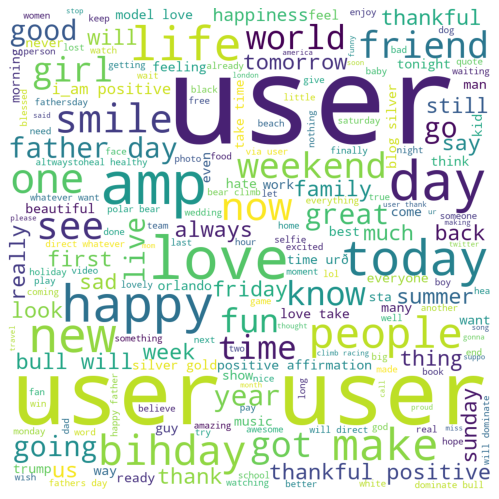

In [ ]:
wc = WordCloud(width = 1000, 
               height = 1000, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df_test["tweet"]))

plt.figure(figsize = (8,8),dpi=80) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [ ]:
df_test["tweet"] =df_test["tweet"].apply(clean_text)

In [ ]:
x_test_data = df_train["tweet"].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_test_data,y,test_size=0.2,random_state=1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversample.fit_resample(x_train.reshape(-1, 1), y_train)
pd.Series(y_over).value_counts()

1    23760
0    23760
dtype: int64

In [ ]:
sent_len=[]
for sent in df_train["tweet"]:
    sent_len.append(len(word_tokenize(sent)))
df_train['sent_len'] = sent_len
df_train.head() 

,label,tweet,sent_len
0,0,user father dysfunctional selfish drag kid dys...,8
1,0,user user thanks lyft credit ca use cause offe...,14
2,0,bihday majesty,2
3,0,model love u take u time,6
4,0,factsguide society motivation,3


In [ ]:
max(sent_len)


37

In [ ]:
np.quantile(sent_len,0.95)

13.0

In [ ]:
max_len = 13

In [ ]:
# Tokenization
tok = Tokenizer(char_level=False,split=' ')
x_train_over=X_over.flatten()
tok.fit_on_texts(x_train_over)

In [ ]:
# vocabulary
tok.index_word

{1: 'user',
 2: 'amp',
 3: 'love',
 4: 'like',
 5: 'trump',
 6: 'day',
 7: 'u',
 8: 'white',
 9: 'black',
 10: 'people',
 11: 'libtard',
 12: 'new',
 13: 'happy',
 14: 'woman',
 15: 'get',
 16: 'time',
 17: 'racist',
 18: 'make',
 19: 'life',
 20: 'one',
 21: 'today',
 22: 'politics',
 23: 'good',
 24: 'liberal',
 25: 'feel',
 26: 'girl',
 27: 'allahsoil',
 28: 'hate',
 29: 'go',
 30: 'might',
 31: 'want',
 32: 'ca',
 33: 'say',
 34: 'see',
 35: 'year',
 36: 'need',
 37: 'thankful',
 38: 'obama',
 39: 'sjw',
 40: 'father',
 41: 'video',
 42: 'positive',
 43: 'retweet',
 44: 'think',
 45: 'listen',
 46: 'via',
 47: 'take',
 48: 'bihday',
 49: 'would',
 50: 'america',
 51: 'smile',
 52: 'got',
 53: 'work',
 54: 'way',
 55: 'thing',
 56: 'never',
 57: 'look',
 58: 'friend',
 59: 'great',
 60: 'stop',
 61: 'really',
 62: 'family',
 63: 'racism',
 64: 'right',
 65: 'back',
 66: 'thanks',
 67: 'world',
 68: 'know',
 69: 'show',
 70: 'going',
 71: 'stomping',
 72: 'men',
 73: 'man',
 74: 'wee

In [ ]:
#Calculate the length of vocabulary 
vocab_len = len(tok.index_word)
print("Length of vocabulary :",vocab_len)

Length of vocabulary : 28788


In [ ]:
# text to sequence encoding
sequences_train = tok.texts_to_sequences(x_train_over)
sequences_train

[[810, 2303, 23, 9033, 47, 23, 513, 7695, 160],
 [5741, 1297, 462, 1491, 12307, 575, 7696, 641, 1061, 3052],
 [1, 1, 1, 1, 1598, 6424, 567],
 [3, 1425, 12308, 12309, 143, 1425, 3659, 12310],
 [1298, 126, 600, 219, 84, 13],
 [1, 16, 15, 181, 4709, 263, 1299, 420, 321],
 [74, 333, 421, 6, 18, 7, 2460, 34, 1350, 230, 19, 12311],
 [992, 12, 223, 422],
 [1, 7697, 3918, 449, 1130, 767],
 [1404, 435, 2304, 53, 435, 9034, 2911, 26],
 [1599, 4461, 32, 128, 172, 369, 4979, 2005, 17, 136, 2809, 6425],
 [91, 19, 195, 6047, 59, 1351, 3434, 2, 1197, 118, 435, 12312, 7698],
 [6916, 48, 89, 48, 641, 1061, 3052],
 [88, 713, 567, 1062, 83, 131, 421, 5466, 369, 35, 170],
 [249, 12313, 1198, 249, 9035, 6048, 2530, 4980, 12314, 6049, 5230, 2374],
 [1, 4710, 29, 10, 131, 9036, 2619, 12315],
 [1, 13, 40, 6, 12316, 12317, 134, 12318, 4711, 12319],
 [797, 279, 1109, 12320, 432, 279, 89, 85, 5467, 4],
 [1, 51, 3919, 18, 25, 1352, 51, 1842, 1941, 176, 3, 669],
 [48, 26, 5742, 226, 6917],
 [12321, 7699, 12322, 90

In [ ]:
# padding (operation of adding zero in document to make it equal length)
sequences_matrix_train = sequence.pad_sequences(sequences_train,maxlen=max_len)
sequences_matrix_train

array([[   0,    0,    0, ...,  513, 7695,  160],
       [   0,    0,    0, ...,  641, 1061, 3052],
       [   0,    0,    0, ..., 1598, 6424,  567],
       ...,
       [   0,    0,    0, ...,    1,    1,  826],
       [   0,    1, 6403, ...,  589, 1127, 6404],
       [   1,    8,   10, ...,  310,   81,  127]], dtype=int32)

In [ ]:
# First document
sequences_matrix_train[0]

array([   0,    0,    0,    0,  810, 2303,   23, 9033,   47,   23,  513,
       7695,  160], dtype=int32)

In [ ]:
#GRU
model = Sequential()
model.add(Embedding(vocab_len+1,70,input_length=max_len,mask_zero=True))
model.add(GRU(128))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(sequences_matrix_train,y_over,batch_size=100,epochs=50)

Epoch 1/50
476/476 [==============================] - 35s 64ms/step - loss: 0.1214
Epoch 2/50
476/476 [==============================] - 30s 64ms/step - loss: 0.0130
Epoch 3/50
476/476 [==============================] - 30s 63ms/step - loss: 0.0068
Epoch 4/50
476/476 [==============================] - 31s 64ms/step - loss: 0.0042
Epoch 5/50
476/476 [==============================] - 30s 63ms/step - loss: 0.0035
Epoch 6/50
476/476 [==============================] - 30s 63ms/step - loss: 0.0027
Epoch 7/50
476/476 [==============================] - 30s 62ms/step - loss: 0.0026
Epoch 8/50
476/476 [==============================] - 30s 62ms/step - loss: 0.0024
Epoch 9/50
476/476 [==============================] - 30s 62ms/step - loss: 0.0054
Epoch 10/50
476/476 [==============================] - 30s 63ms/step - loss: 0.0062
Epoch 11/50
476/476 [==============================] - 30s 62ms/step - loss: 0.0028
Epoch 12/50
476/476 [==============================] - 30s 62ms/step - loss: 0.0022
E

In [ ]:
sequences_matrix_test = sequence.pad_sequences(tok.texts_to_sequences(x_test),maxlen=max_len)

In [ ]:
sequences_matrix_test

array([[    0,     0,     0, ...,    65,    92,  2327],
       [    0,     0,     0, ...,  8352,  8352,  6259],
       [    0,     0,     0, ...,   543,    48,  1642],
       ...,
       [    0,     0,     0, ...,   854,  1094,  3443],
       [    0,     0,     0, ...,     2,  1426, 27534],
       [    0,   330,  2621, ...,   140,   161,   177]], dtype=int32)

# Prediction on Testing dataset

In [ ]:
y_pred=model.predict(sequences_matrix_test)
y_pred = np.where(y_pred >= 0.5,1,0)
print(y_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


# Test dataset report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5960
           1       0.61      0.52      0.56       433

    accuracy                           0.94      6393
   macro avg       0.79      0.75      0.77      6393
weighted avg       0.94      0.94      0.94      6393

